In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import OneHotEncoder

In [2]:
medical_df = pd.read_csv('insurance.csv')

In [3]:
medical_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### Problem Statement

- Predict the value of charges using the vlaue in other columns.
- If we are able to do this for historical data, we should be able to do it for the future data as well.

In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

This will improve the default style and font size of the charts

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [7]:
medical_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [8]:
fig = px.histogram(medical_df, 
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')

fig.update_layout(
    width=900, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
    paper_bgcolor='#2f2f2f', 
    xaxis=dict(
        title_text='Age', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Count', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    bargap=0.1
)

fig.show()

In [9]:
medical_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [10]:
fig = px.histogram(medical_df, 
                   x='bmi',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')

fig.update_layout(
    width=900, 
    height=400,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
    paper_bgcolor='#2f2f2f', 
    xaxis=dict(
        title_text='Age', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Count', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    bargap=0.1,
)
fig.update_traces(marker_color='red')
fig.show()

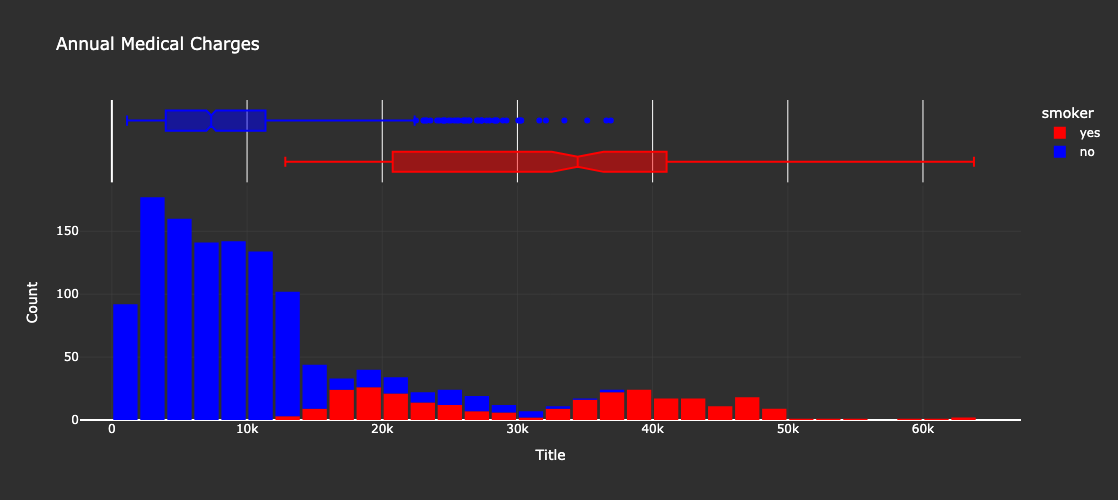

In [11]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   nbins=47,
                   color='smoker',
                   color_discrete_sequence=['red', 'blue'],
                   title='Annual Medical Charges',
                  )
fig.update_layout(
    width=900, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
    paper_bgcolor='#2f2f2f', 
    xaxis=dict(
        title_text='Title', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Count', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    bargap=0.1,
)

fig.show()

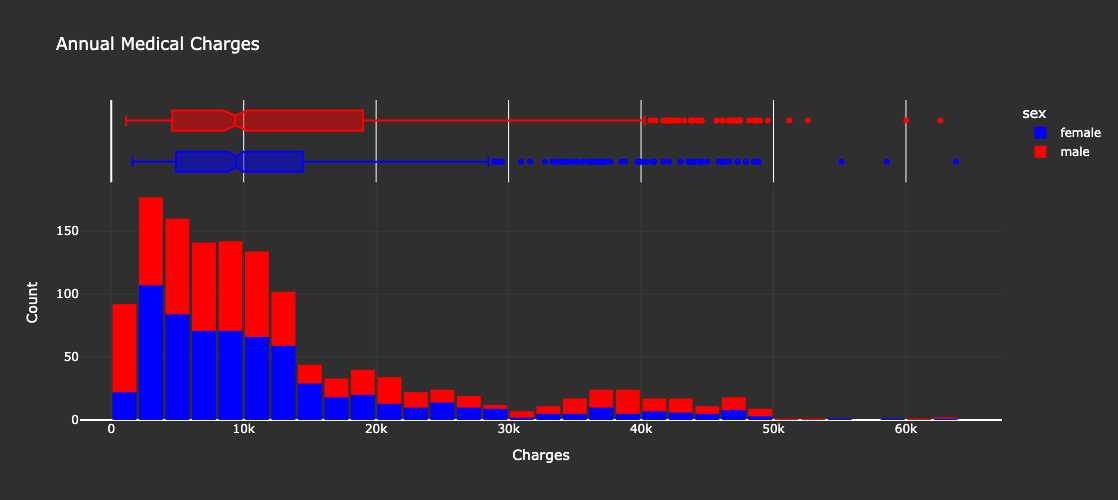

In [12]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   nbins=47,
                   color='sex',
                   color_discrete_sequence=['blue', 'red'],
                   title='Annual Medical Charges',
                  )
fig.update_layout(
    width=900, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
    paper_bgcolor='#2f2f2f', 
    xaxis=dict(
        title_text='Charges', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Count', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    bargap=0.1,
)

fig.show()

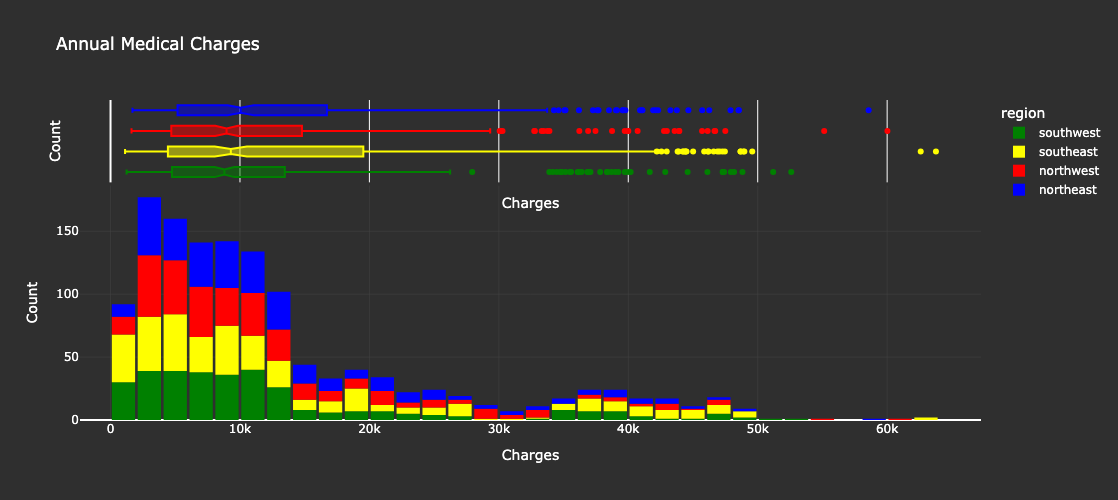

In [13]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   nbins=47,
                   color='region',
                   color_discrete_sequence=['green', 'yellow', 'red', 'blue'],
                   title='Annual Medical Charges',
                  )
# fig.update_layout(bargap=0.1, height=700)
fig.update_layout(
    # width=900, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
     paper_bgcolor='#2f2f2f',
    xaxis=dict(
        title_text='Age', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Count', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    bargap=0.1,
)
fig.update_xaxes(title='Charges')
fig.update_yaxes(title='Count')
fig.show()

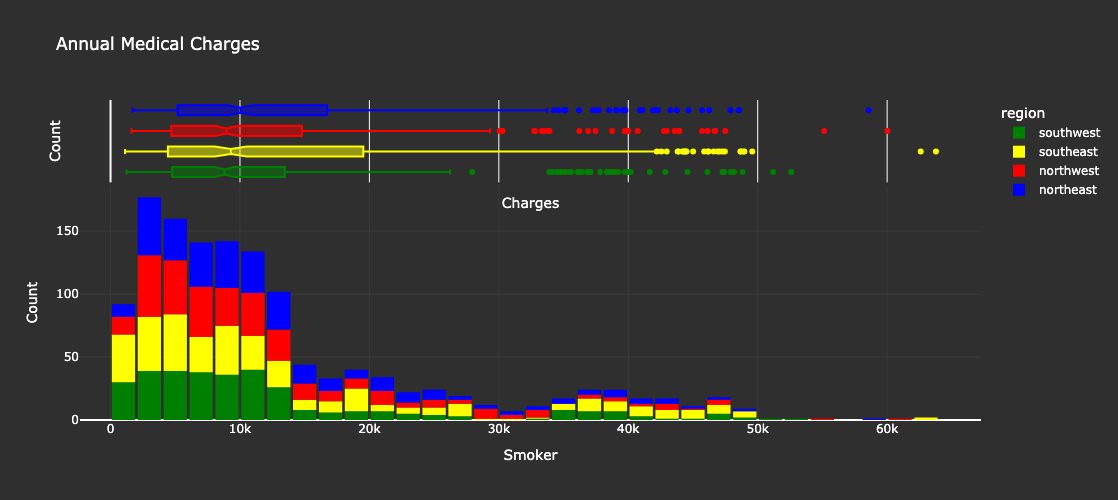

In [14]:
px.histogram(medical_df, 
             x='smoker', 
             color='sex', 
             title='Smoker', 
             width=600, 
             height=400)

fig.update_layout(
    # width=900, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
     paper_bgcolor='#2f2f2f',
    xaxis=dict(
        title_text='Smoker', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Count', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    bargap=0.1,
)

## Age and Charges
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

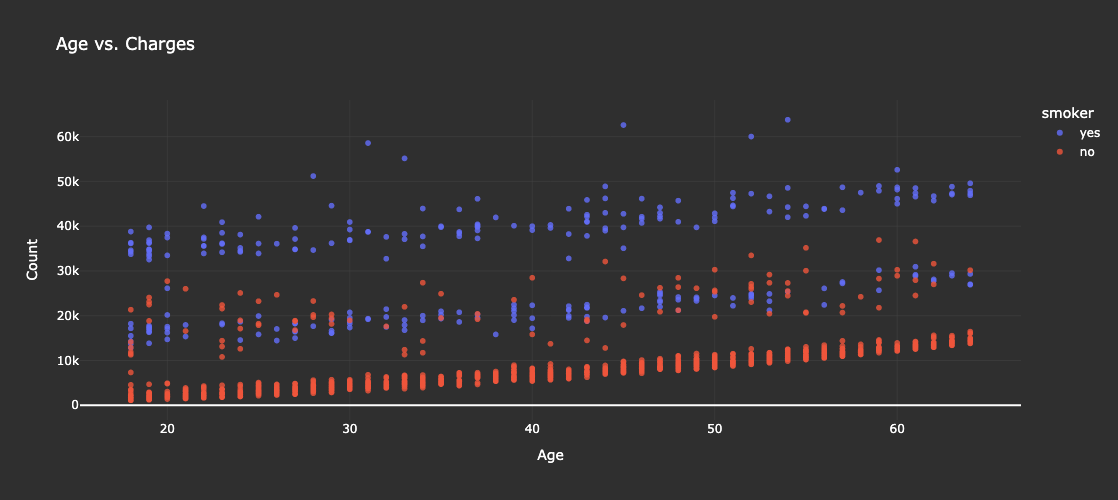

In [15]:
fig = px.scatter(medical_df, 
                 x='age',  
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges',
                 width=600,
                 height=800
                )
fig.update_layout(
    width=1000, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
    paper_bgcolor='#2f2f2f',
    xaxis=dict(
        title_text='Age', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Count', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    bargap=0.1,
)
fig.show()

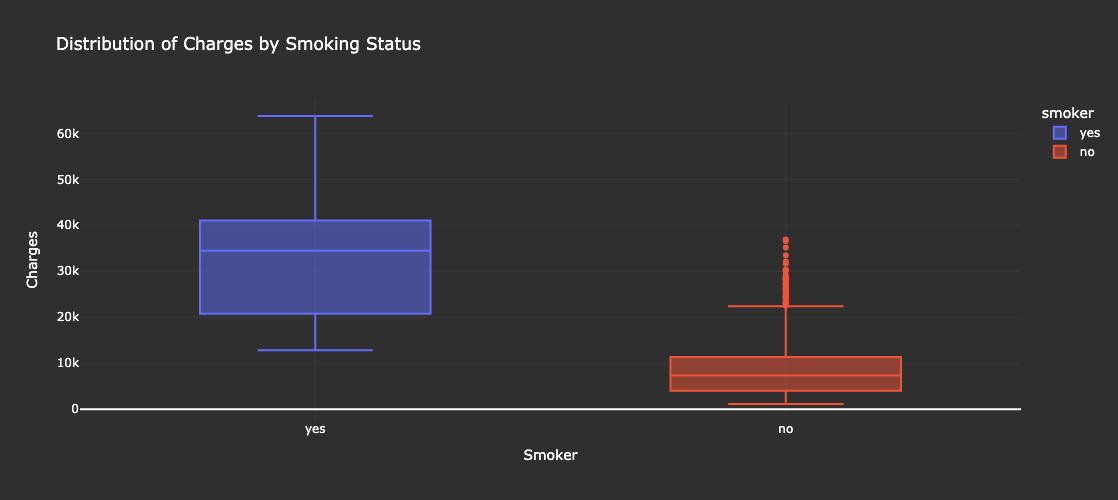

In [16]:
fig = px.box(medical_df, 
             x='smoker', 
             y='charges', 
             color='smoker',
             title='Distribution of Charges by Smoking Status',
             width=1000,
             height=500
            )
fig.update_layout(
    font_color='white',
    plot_bgcolor='#2f2f2f',  
    paper_bgcolor='#2f2f2f',
    xaxis=dict(
        title_text='Smoker', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Charges', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    bargap=0.1,
)
fig.show()


We can make the following observations from the above chart:
• The general trend seems to be that medical charges increase with age, as we might expect.
However, there is significant variation at every age, jand it's clear that age alone cannot be used to accurately determine medical charges.
• We can see three "clusters" of points, each of which seems to form a line with an increasing slope:
1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and
"smokers without major medical issues".
3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

## BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

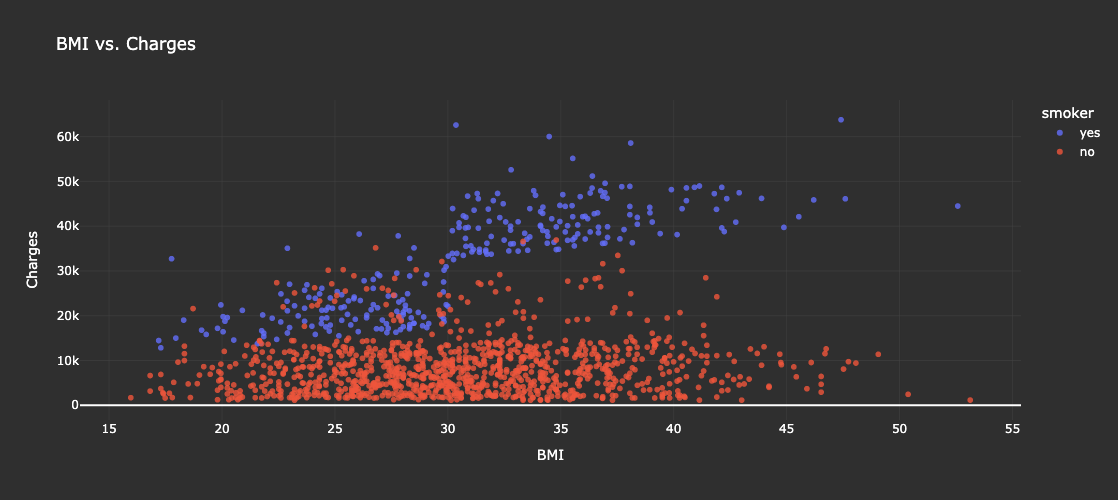

In [17]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges',
                 height=600,
                 width=800
                )
fig.update_layout(
    width=900, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
     paper_bgcolor='#2f2f2f',
    xaxis=dict(
        title_text='BMI', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Charges', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    bargap=0.1,
)


fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be directly related to increase in medical charges. However, medical charges aseem to be significantly high for smokers with BMI of 30 or highter

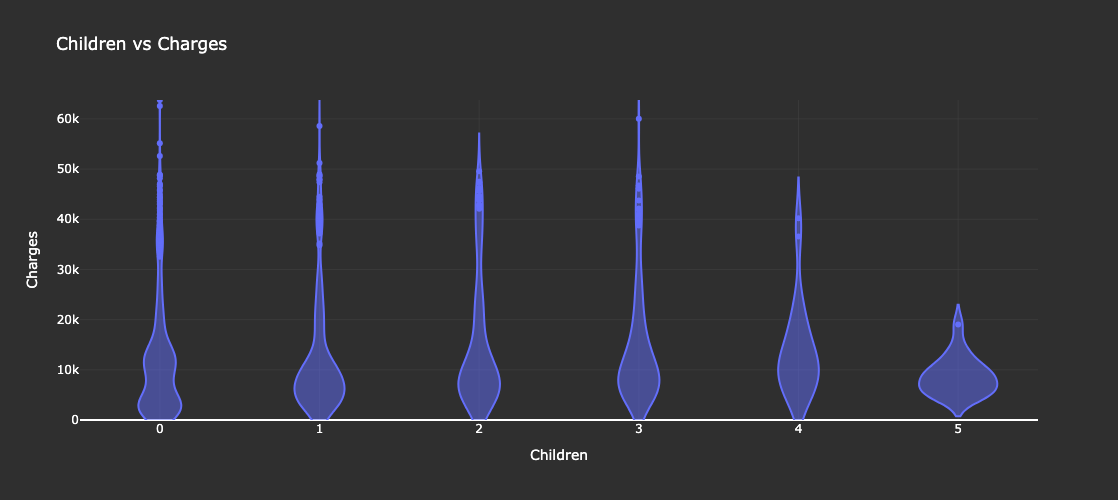

In [18]:
fig = px.violin(medical_df,
         x='children',
         y='charges',
         title='Children vs Charges')

fig.update_layout(
    width=900, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
    paper_bgcolor='#2f2f2f',
    xaxis=dict(
        title_text='Children', 
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Charges', 
        gridcolor='#444444', 
        gridwidth=0.5,
        range=[0, medical_df['charges'].max()]
    ),
    bargap=0.1,
)
fig.show()

In [19]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df['smoker'].map(smoker_values)

In [20]:
print('Charges-Age Corr: ',medical_df['charges'].corr(medical_df['age']).round(2))
print('Charges-BMI Corr: ', medical_df['charges'].corr(medical_df['bmi']).round(2))
print('Charges-Child Corr: ', medical_df['charges'].corr(medical_df['children']).round(2))
print('Charges-Smoker Corr: ', medical_df['charges'].corr(smoker_numeric).round(2))

Charges-Age Corr:  0.3
Charges-BMI Corr:  0.2
Charges-Child Corr:  0.07
Charges-Smoker Corr:  0.79


In [21]:
numeric_columns = medical_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    if col != 'charges':
        correlation = medical_df['charges'].corr(medical_df[col]).round(2)
        print(f"charges and {col}: {correlation}")

charges and age: 0.3
charges and bmi: 0.2
charges and children: 0.07


In [22]:
medical_df[['age', 'bmi', 'children', 'charges']].corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

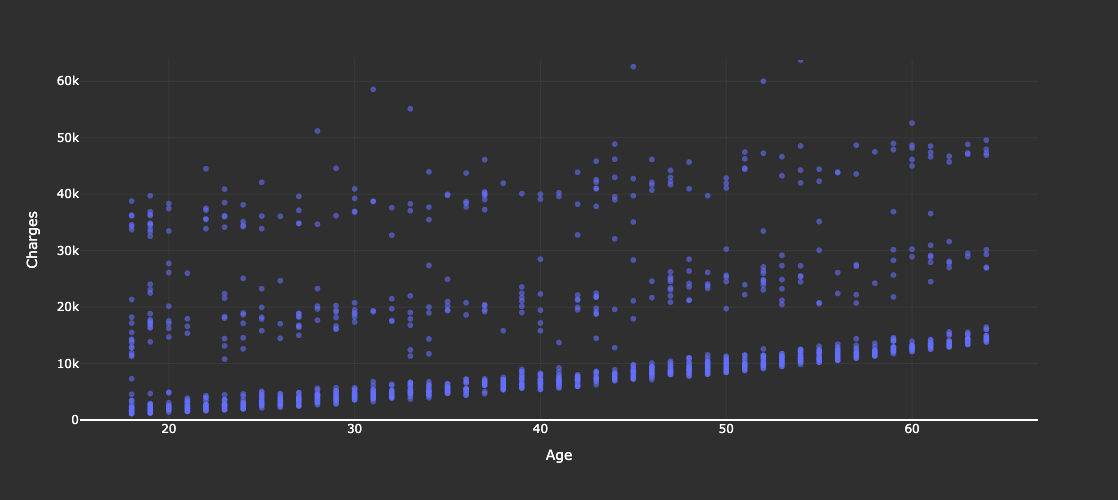

In [23]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    opacity=0.6,
    size_max=15
)
fig.update_layout(
    width=900, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
    paper_bgcolor='#2f2f2f',
    xaxis=dict(
        title_text='Age',
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Charges', 
        gridcolor='#444444', 
        gridwidth=0.5,
        range=[0, medical_df['charges'].max()]
    ),
    bargap=0.1,
)
fig.show()

Text(0.5, 1.0, 'Correlation Matrix')

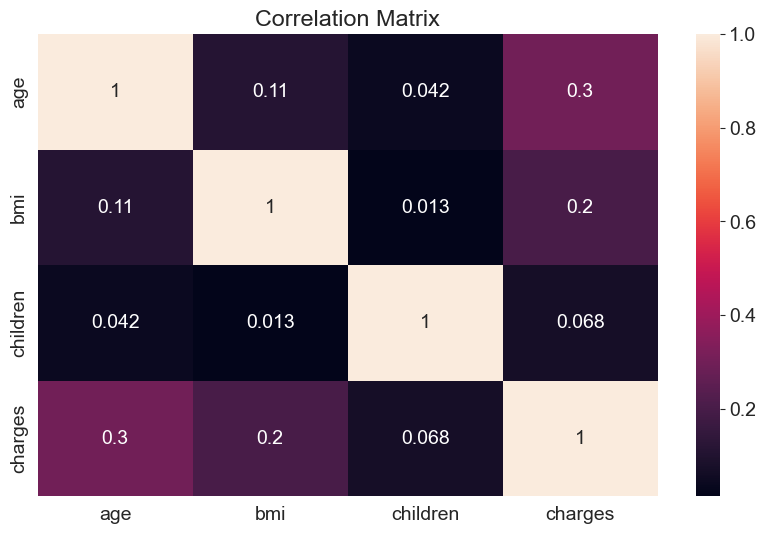

In [24]:
sns.heatmap(medical_df[['age', 'bmi', 'children', 'charges']].corr(), annot=True)
plt.title('Correlation Matrix')

In [25]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no']
non_smoker_df.head(5)

age     sex     bmi  children smoker     region      charges
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160

In [26]:
w = 50
b = 100
def calculate_charges(age, w, b):
  return w * age + b

In [27]:
ages = non_smoker_df['age']
estimated_charges = calculate_charges(ages, w, b)

In [28]:
estimated_charges.head()

1    1000
2    1500
3    1750
4    1700
5    1650
Name: age, dtype: int64

In [29]:
non_smoker_df['charges'].head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

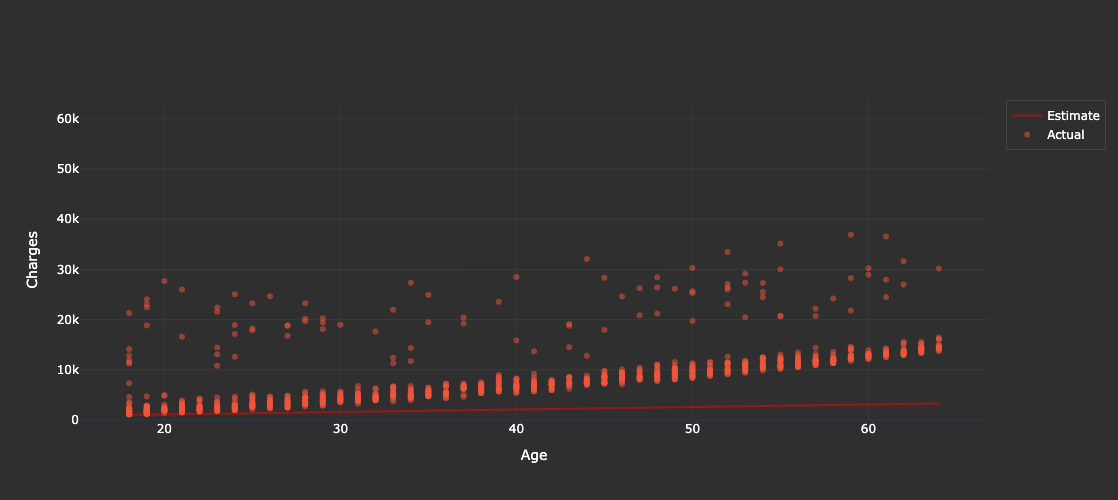

In [37]:
line_trace = go.Scatter(
    x=ages,
    y=estimated_charges,
    mode='lines',
    line=dict(color='red', width=2),
    opacity=0.5,
    name='Estimate'
)
scatter_trace = go.Scatter(
    x=ages,
    y=non_smoker_df['charges'],
    mode='markers',
    marker=dict(size=6, opacity=0.5),
    name='Actual'
)
fig = go.Figure(data=[line_trace, scatter_trace])
fig.update_layout(
    width=900, 
    height=500,
    font_color='white',
    plot_bgcolor='#2f2f2f',  
    paper_bgcolor='#2f2f2f',
    template='plotly_dark',
    xaxis=dict(
        title_text='Age',
        gridcolor='#444444', 
        gridwidth=0.5
    ),
    yaxis=dict(
        title_text='Charges', 
        gridcolor='#444444', 
        gridwidth=0.5,
        range=[0, medical_df['charges'].max()]
    ),
    bargap=0.1,
    legend=dict(
        font=dict(color='white'),
        bgcolor='#2f2f2f',
        bordercolor='#444444',
        borderwidth=1
    )
)
fig.show()

RMSE Loss: 8461.949562575493


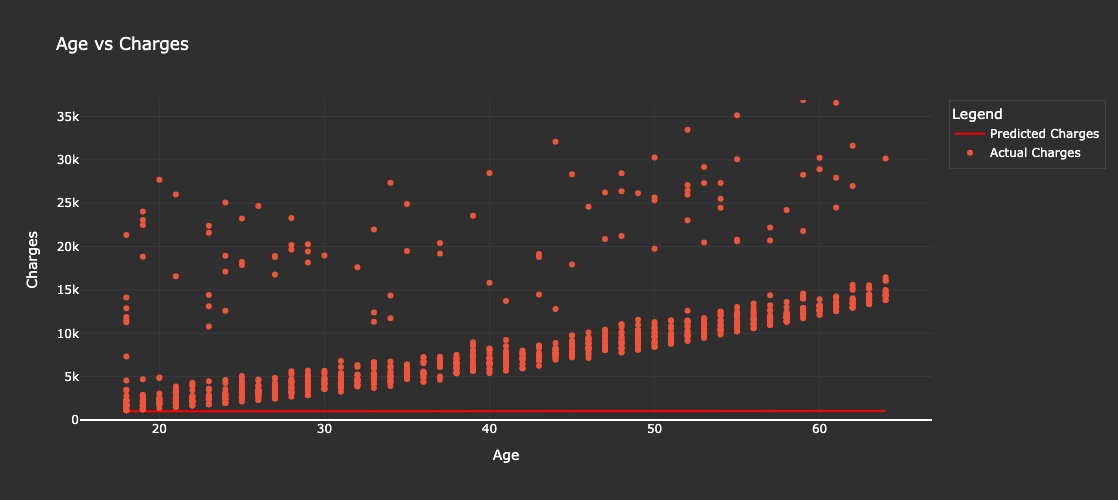

In [57]:
def try_parameters(w, b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']
    predicted_charges = calculate_charges(ages, w, b)

    loss = rmse(target, predictions)
    print(f'RMSE Loss: {loss}')
    
    line_trace = go.Scatter(
        x=ages,
        y=predicted_charges,
        mode='lines',
        line=dict(color='red', width=2),
        name='Predicted Charges'
    )

    scatter_trace = go.Scatter(
        x=ages,
        y=target,
        mode='markers',
        marker=dict(size=6),
        name='Actual Charges'
    )
    fig = go.Figure(data=[line_trace, scatter_trace])
    fig.update_layout(
        title='Age vs Charges',
        xaxis_title='Age',
        yaxis_title='Charges',
        width=900, 
        height=500,
        font_color='white',
        plot_bgcolor='#2f2f2f',  
        paper_bgcolor='#2f2f2f',
        xaxis=dict(
            gridcolor='#444444', 
            gridwidth=0.5
        ),
        yaxis=dict(
            gridcolor='#444444', 
            gridwidth=0.5,
            range=[0, target.max()]
        ),
        legend=dict(
            title_text='Legend',
            font=dict(color='white'),
            bgcolor='#2f2f2f',
            bordercolor='#444444',
            borderwidth=1
        )
    )
    fig.show()

try_parameters(w=0.5, b=1000) 


RMSE Loss: 8461.949562575493


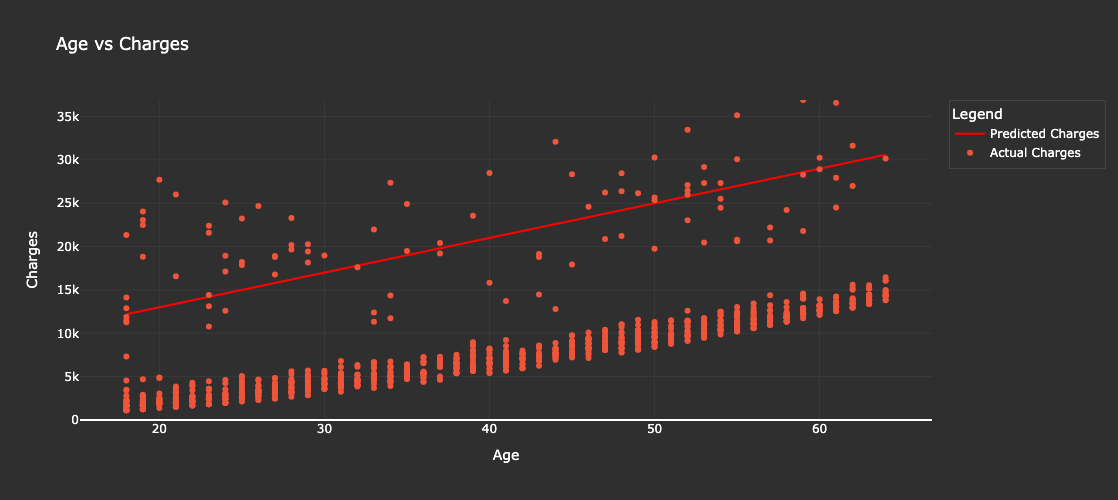

In [58]:
try_parameters(400, 5000)

RMSE Loss: 8461.949562575493


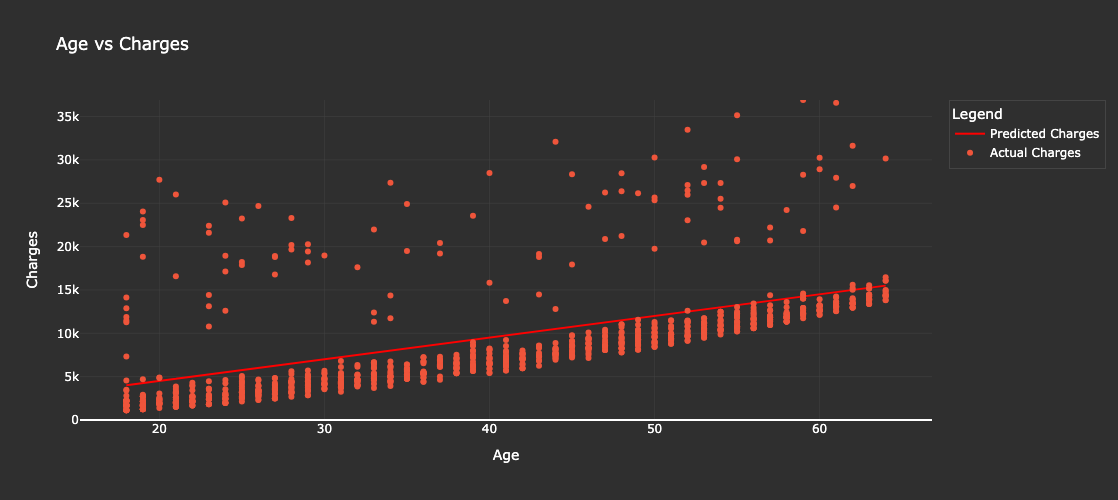

In [59]:
try_parameters(250, -500)

In [60]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

Let's calculate the RMSE for our model with a sample of weights.

In [61]:
w = 50
b = 100

RMSE Loss: 8461.949562575493


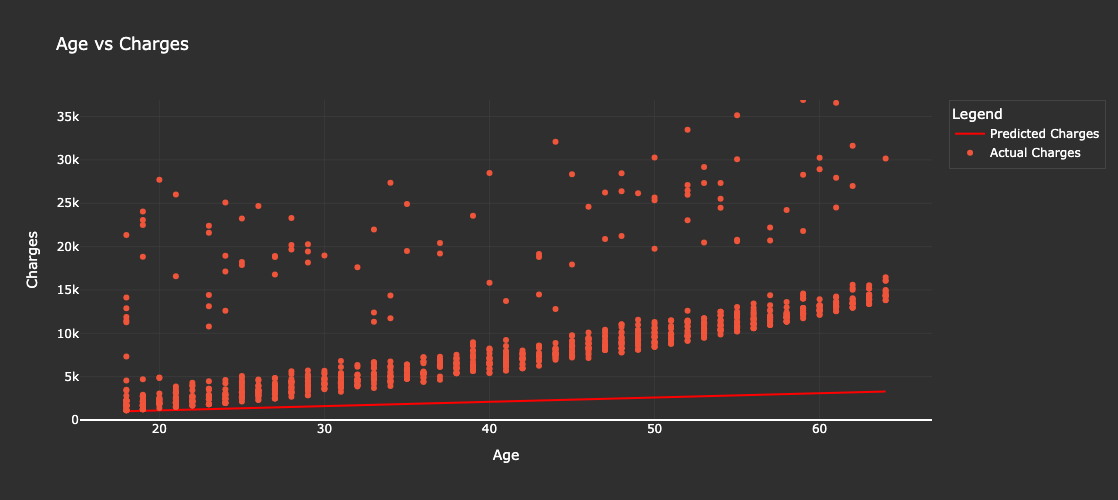

In [62]:
try_parameters(w, b)

In [63]:
targets = medical_df['charges']
predictions = calculate_charges(non_smoker_df['age'], w, b)

In [64]:
rmse(targets, predictions)

np.float64(8461.949562575493)

RMSE Loss: 8461.949562575493


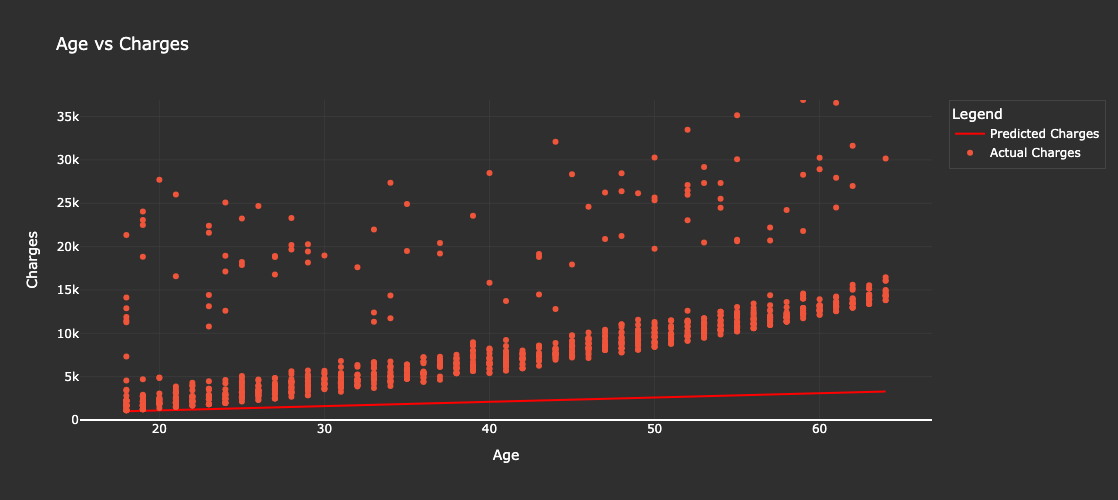

In [65]:
try_parameters(50, 100)

RMSE Loss: 8461.949562575493


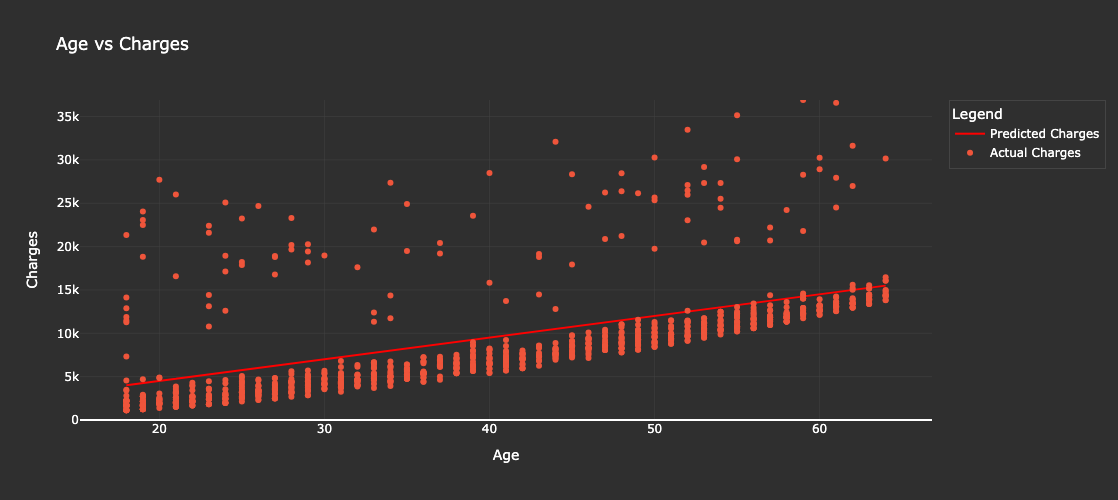

In [66]:
try_parameters(250, -500)

In [69]:
model = LinearRegression()
model

LinearRegression()

In [70]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [72]:
model.fit(inputs, targets)

LinearRegression()

In [73]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/Users/muneer/Desktop/linear-regression-scikitlearn/venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [74]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [75]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [76]:
print(f'w: {model.coef_}')
print(f'b: [{model.intercept_}]')

w: [267.24891283]
b: [-2091.420556565021]


In [79]:
model.intercept_

np.float64(-2091.420556565021)

RMSE Loss: 4662.505766636395


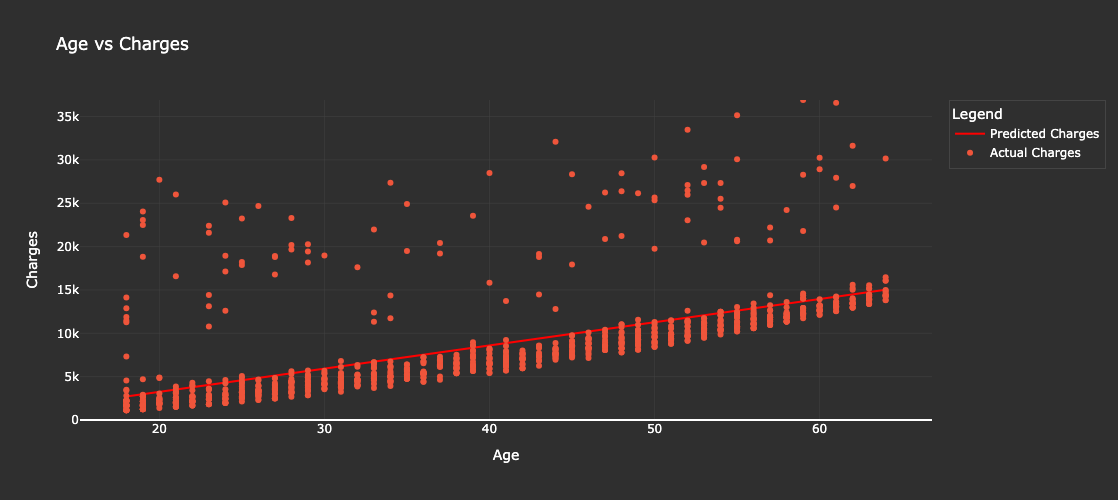

In [80]:
try_parameters(model.coef_, model.intercept_)

In [81]:
sgd_model = SGDRegressor()

In [83]:
input_1 = medical_df['smoker'] == 'yes'
input_1.head(5)

0     True
1    False
2    False
3    False
4    False
Name: smoker, dtype: bool

In [84]:
sgd_model.fit(inputs, targets)

SGDRegressor()

In [85]:
sgd_predictions = sgd_model.predict(inputs)
sgd_predictions

array([4223.33354435, 6023.06692216, 6922.93361107, ..., 4223.33354435,
       4223.33354435, 4763.2535577 ])

RMSE Loss: 4662.505766636395


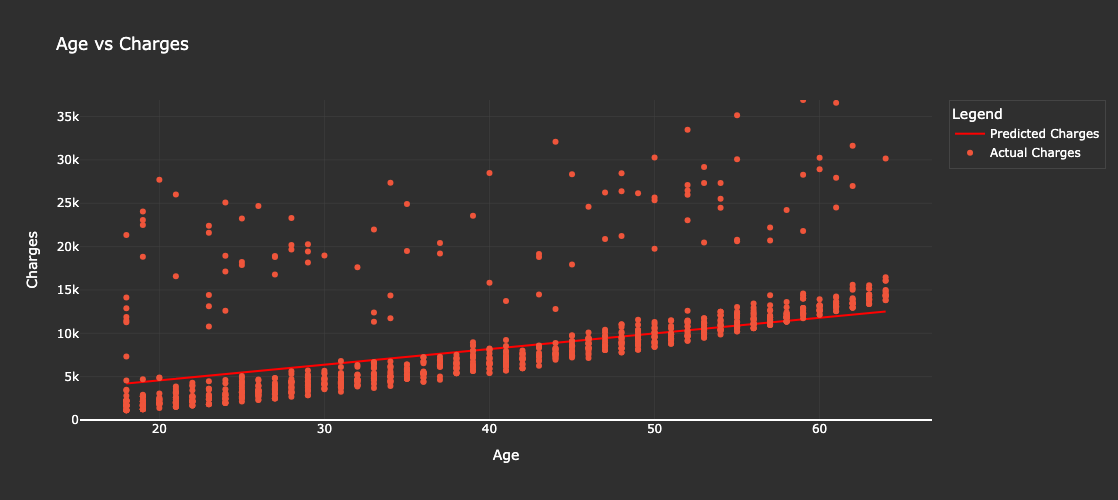

In [86]:
try_parameters(sgd_model.coef_, sgd_model.intercept_)

In [87]:
# Create input and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create & train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Calculate loss
loss = rmse(targets, predictions)
print(loss)

4662.505766636395


# Linear Regression with Multiple Features

So far we have only used 1 feature `age`, but let's try using multiple features this time, `age` and `bmi`

Essentially, we're only changing 1 line of code to include `bmi` to our model.

In [88]:
# Create input and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create & train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Calculate loss
loss = rmse(targets, predictions)
print(loss)

4662.3128354612945


As we can see, adding `bmi` to our model didn't show any significat impact on our loss which is understandable because as `bmi` has a very weak correlation with `charges`, especially for non-smokers.

In [90]:
# Create input and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create & train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Calculate loss
loss = rmse(targets, predictions)
print(f'Non smoker loss: {loss}')

Non smoker loss: 4608.470405038247


In [91]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']
smoker_df.head()

age     sex    bmi  children smoker     region     charges
0    19  female  27.90         0    yes  southwest  16884.9240
11   62  female  26.29         0    yes  southeast  27808.7251
14   27    male  42.13         0    yes  southeast  39611.7577
19   30    male  35.30         0    yes  southwest  36837.4670
23   34  female  31.92         1    yes  northeast  37701.8768

In [92]:
# Create input and targets
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

# Create & train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Calculate loss
loss = rmse(targets, predictions)
print(f'Smoker Loss: {loss}')

Smoker Loss: 5718.202480524155


In [93]:
# Create input and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create & train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Calculate loss
loss = rmse(targets, predictions)
print(f'Total Loss: {loss}')

Total Loss: 11355.317901125973


In [ ]:
intercept = model.intercept_

fig = go.Figure(data=[go.Scatter(x=[1, 2], y=[1, 2])])  # Replace with your plot data

fig.add_annotation(
    text=f"Intercept: {intercept:.2f}",
    xref="paper",
    yref="paper",
    x=1,
    y=1,
    showarrow=False
)

fig.show()

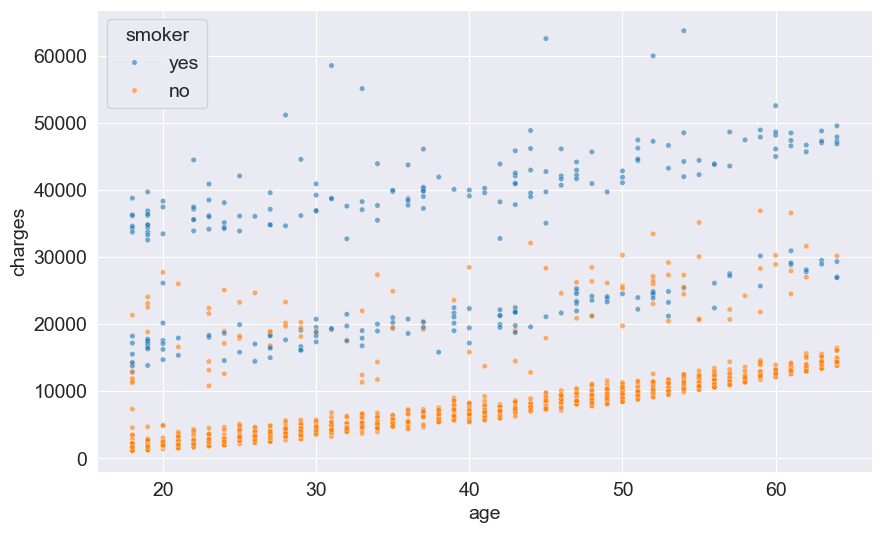

In [94]:
sns.scatterplot(data=medical_df,
                x='age',
                y='charges',
                hue='smoker',
                alpha=0.6,
                s=15
)
plt.show()